<a href="https://colab.research.google.com/gist/nishanth1104/71e39d38dd2eb29bc36b003583184ee6/final_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
#to ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_class = pd.read_csv("/content/drive/MyDrive/Project Files/DataSet(C4).csv")
df_class.sample(5).style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
31176,1,0,1,1,-6.784821,7.557305,-1.723756,-0.000016,0.708003,-0.707987
17697,1,0,0,1,-8.632864,-3.484600,3.120724,1.131606,-2.136852,1.005246
9587,0,0,0,0,3.766309,-2.489728,-1.276581,2.048928,-0.491917,-1.557010
4017,0,0,0,0,3.602250,-2.930104,-0.672146,2.121665,-0.823962,-1.297704
30461,1,0,1,1,16.309245,-28.062439,3.726910,0.000034,-1.670784,1.670750


In [ ]:
df_class.info()
#to get dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38401 entries, 0 to 38400
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       38401 non-null  int64  
 1   C       38401 non-null  int64  
 2   B       38401 non-null  int64  
 3   A       38401 non-null  int64  
 4   Ia      38401 non-null  float64
 5   Ib      38401 non-null  float64
 6   Ic      38401 non-null  float64
 7   Va      38401 non-null  float64
 8   Vb      38401 non-null  float64
 9   Vc      38401 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 2.9 MB


In [ ]:
# to check null values present in data set (if present, then we have to remove them)
df_class.isnull().sum().sum()


0

In [ ]:
df_class.shape
#(rows,columns)

(38401, 10)

In [ ]:

#string concatenation is performed on G,C,B,A and created new column Fault_Type

df_class['Fault_Type'] = df_class['G'].astype('str') + df_class['C'].astype('str') + df_class['B'].astype('str') + df_class['A'].astype('str')
df_class.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,0,0,0,0,-0.855954,-2.805821,3.661775,0.529457,-2.059695,1.530238,0000
1,0,0,0,0,-0.813669,-2.835140,3.648810,0.552864,-2.066098,1.513234,0000
2,0,0,0,0,-0.771280,-2.864097,3.635377,0.576199,-2.072237,1.496037,0000
3,0,0,0,0,-0.728793,-2.892687,3.621480,0.599462,-2.078110,1.478649,0000
4,0,0,0,0,-0.686212,-2.920907,3.607119,0.622647,-2.083718,1.461071,0000


In [ ]:
# labelling of data
df_class['Fault_Type'][df_class['Fault_Type'] == '0000' ] = 'NO Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '1001' ] = 'Line A to Ground Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '1010' ] = 'Line B to Ground Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '1100' ] = 'Line C to Ground Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '0011' ] = 'Line A to Line B Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '0101' ] = 'Line A to Line C Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '0110' ] = 'Line B to Line C Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '1011' ] = 'Line A Line B to Ground Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '1101' ] = 'Line A Line C to Ground Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '1110' ] = 'Line B Line C to Ground Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '0111' ] = 'Line A Line B Line C'
df_class['Fault_Type'][df_class['Fault_Type'] == '1111' ] = 'Line A Line B Line C to Ground Fault'


In [ ]:
#checking out random sample data of size 12.
df_class.sample(12).style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
5282,0,0,0,0,0.676731,2.927098,-3.603829,-0.627797,2.084943,-1.457147,NO Fault
25431,0,0,1,1,32.228413,-31.119203,-1.108952,0.000056,0.621249,-0.621304,Line A to Line B Fault
32327,1,1,0,1,-58.049996,-1.858572,66.069692,1.007808,-1.007912,0.000104,Line A Line C to Ground Fault
18939,1,0,0,1,3.829625,-1.901059,-1.931754,1.716338,-0.093098,-1.623240,Line A to Ground Fault
31480,1,1,0,1,78.073189,2.352006,-103.751453,-1.051501,1.051650,-0.000150,Line A Line C to Ground Fault
7239,0,0,0,0,-0.136288,-3.247398,3.383686,0.910890,-2.131720,1.220830,NO Fault
24706,0,0,1,1,-1.773273,4.849038,-3.075169,-0.000008,1.432135,-1.432127,Line A to Line B Fault
13026,0,0,0,0,2.033617,1.794783,-3.828400,0.179834,1.756141,-1.935976,NO Fault
38189,1,1,1,1,22.231696,56.495586,-78.727282,-0.000032,0.000113,-0.000081,Line A Line B Line C to Ground Fault
25290,0,0,1,1,-1.096282,4.737131,-3.640128,-0.000006,1.730015,-1.730009,Line A to Line B Fault


In [ ]:
#describing data with all important parameters
df_class.describe().style.background_gradient(cmap='rainbow').set_precision(3)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,38401.000,38401.000,38401.000,38401.000,38401.000,38401.000,38401.000,38401.000,38401.000,38401.000
mean,0.378,0.341,0.342,0.352,2.739,-2.016,-0.737,0.023,-0.004,-0.018
std,0.485,0.474,0.474,0.477,24.324,39.319,49.936,1.291,1.285,1.293
min,0.000,0.000,0.000,0.000,-81.297,-132.858,-143.511,-2.538,-2.593,-2.777
25%,0.000,0.000,0.000,0.000,-3.352,-3.504,-3.507,-1.098,-1.129,-1.147
50%,0.000,0.000,0.000,0.000,0.220,-0.048,-0.061,0.000,-0.000,-0.000
75%,1.000,1.000,1.000,1.000,3.558,3.511,3.506,1.178,1.108,1.109
max,1.000,1.000,1.000,1.000,100.137,118.381,140.451,2.724,2.319,2.302


In [ ]:
#count of each fault in data
df_class['Fault_Type'].value_counts(ascending=False)

NO Fault                                16667
Line A to Ground Fault                   2701
Line B to Ground Fault                   2334
Line C to Ground Fault                   2299
Line A to Line B Fault                   1800
Line B to Line C Fault                   1800
Line A to Line C Fault                   1800
Line A Line B to Ground Fault            1800
Line A Line C to Ground Fault            1800
Line B Line C to Ground Fault            1800
Line A Line B Line C                     1800
Line A Line B Line C to Ground Fault     1800
Name: Fault_Type, dtype: int64

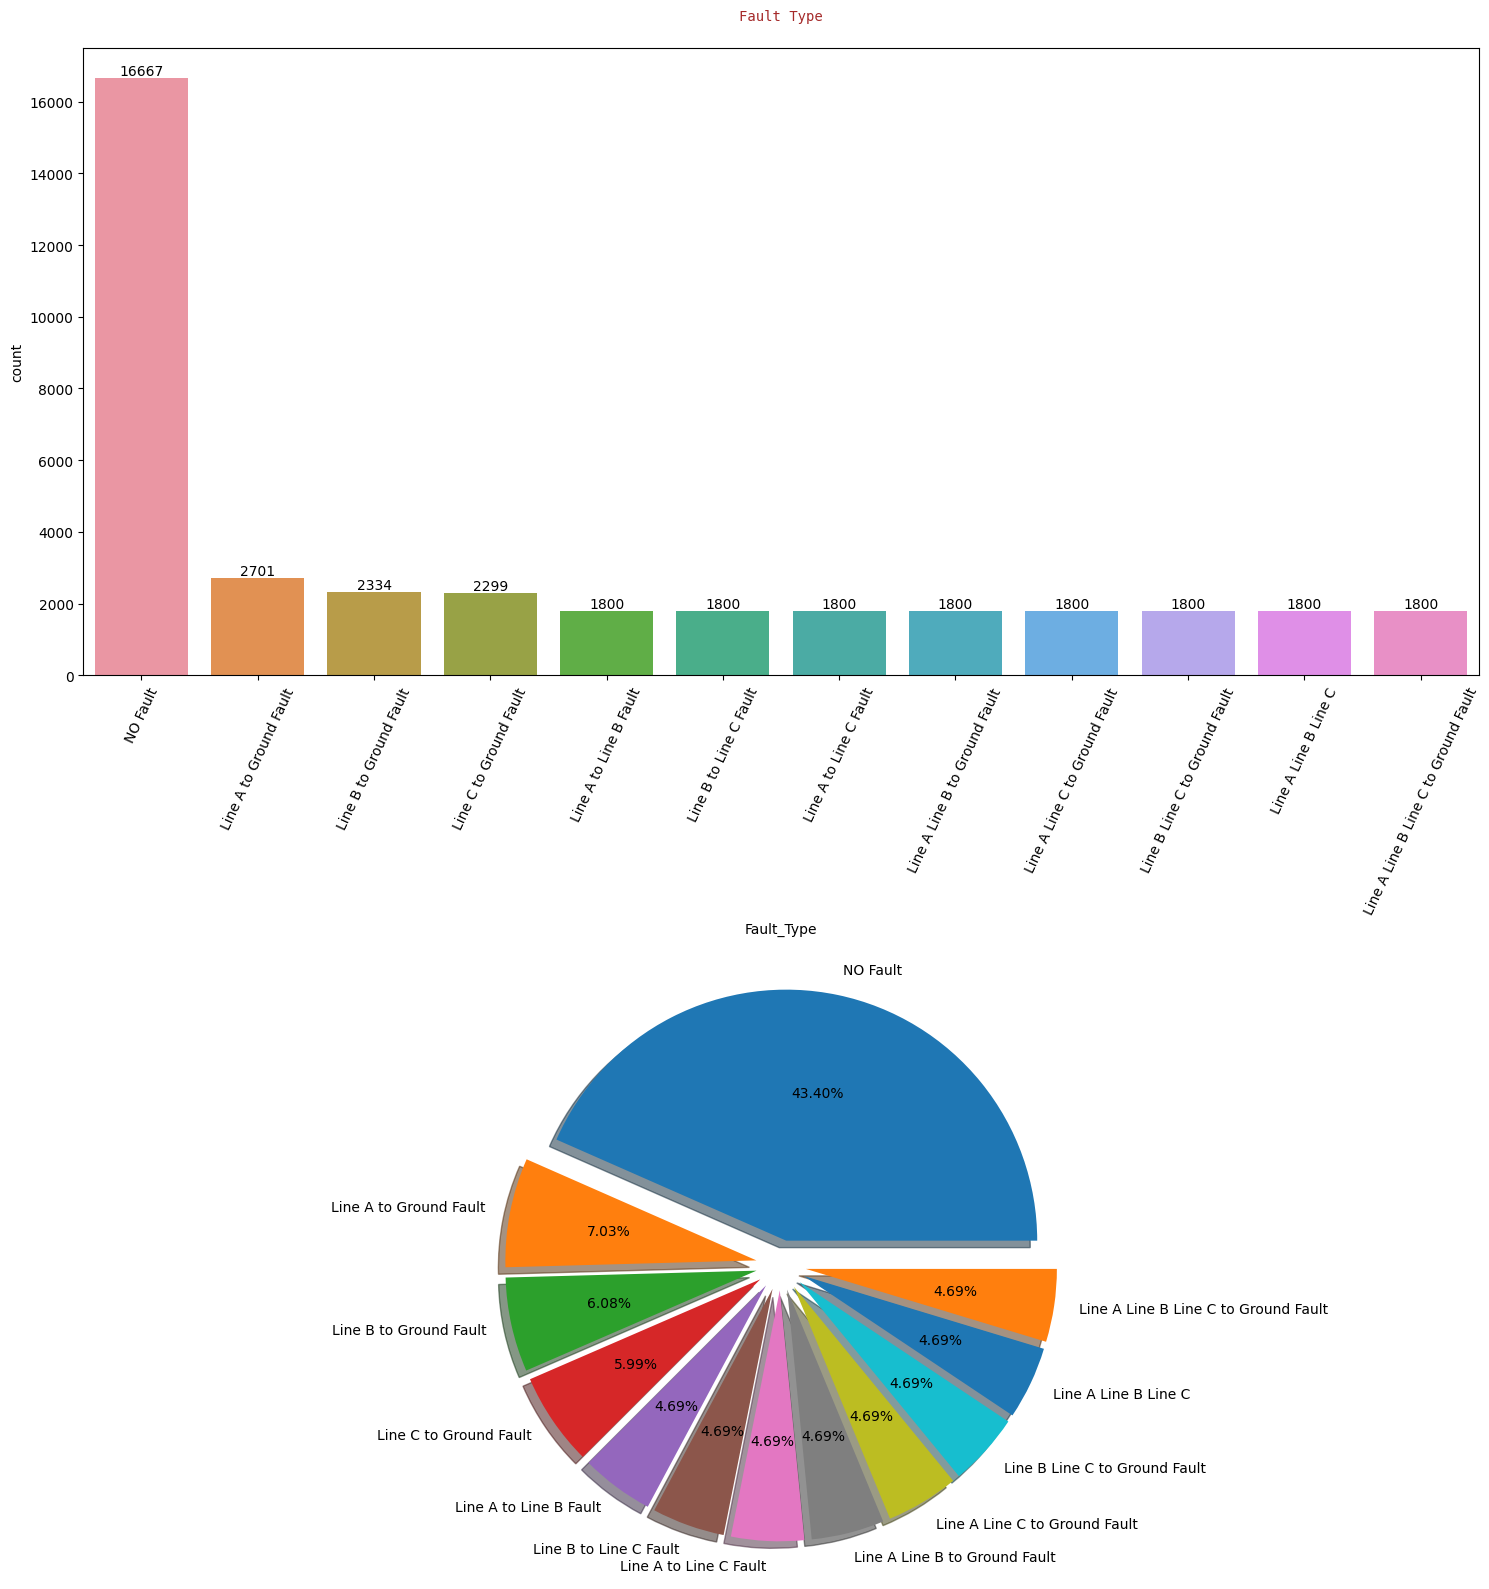

In [ ]:
#data visualization

ax = plt.figure(figsize = (15,16))
ax = plt.subplot(2,1,1)
ax = sns.countplot(x='Fault_Type', data=df_class)
ax.bar_label(ax.containers[0])
plt.title("Fault Type", fontsize=20,color = 'Brown',font='monospace',pad=20)
plt.xticks(rotation=65)
plt.tight_layout()

ax =plt.subplot(2,1,2)
ax=df_class['Fault_Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1,0.1, 0.1,0.1,0.1, 0.1,0.1,0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
plt.tight_layout()
plt.axis('off');

In [ ]:
#removing unnecessary features for proper accuracy
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier
df_class.drop('G', inplace=True, axis=1)
df_class.drop('C', inplace=True, axis=1)
df_class.drop('B', inplace=True, axis=1)
df_class.drop('A', inplace=True, axis=1)
encoder = LabelEncoder()
df_class['Fault_Type'] = encoder.fit_transform(df_class['Fault_Type'])
df_class.head()

,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,-0.855954,-2.805821,3.661775,0.529457,-2.059695,1.530238,11
1,-0.813669,-2.835140,3.648810,0.552864,-2.066098,1.513234,11
2,-0.771280,-2.864097,3.635377,0.576199,-2.072237,1.496037,11
3,-0.728793,-2.892687,3.621480,0.599462,-2.078110,1.478649,11
4,-0.686212,-2.920907,3.607119,0.622647,-2.083718,1.461071,11


In [ ]:
X = df_class.drop(['Fault_Type'],axis=1)
y = df_class['Fault_Type']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 43.46 %
Model Accuracy Score : 43.18 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       331
           1       0.00      0.00      0.00       394
           2       0.00      0.00      0.00       367
           3       0.00      0.00      0.00       353
           4       0.00      0.00      0.00       542
           5       0.00      0.00      0.00       337
           6       0.00      0.00      0.00       364
           7       0.00      0.00      0.00       379
           8       0.00      0.00      0.00       468
           9       0.00      0.00      0.00       374
          10       0.00      0.00      0.00       455
          11       0.43      1.00      0.60      3317

    accuracy                           0.43      7681
   macro avg       0.04      0.08      0.05      7681
weighted avg       0.19      0.43      0.26 

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 96.5 %
Model Accuracy Score : 88.02 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.16      0.22      0.19       331
           1       0.09      0.07      0.08       394
           2       0.93      0.90      0.92       367
           3       0.89      0.92      0.90       353
           4       0.98      0.96      0.97       542
           5       0.90      0.93      0.91       337
           6       0.92      0.89      0.90       364
           7       0.83      0.85      0.84       379
           8       0.99      0.97      0.98       468
           9       0.85      0.83      0.84       374
          10       0.99      0.97      0.98       455
          11       0.99      1.00      1.00      3317

    accuracy                           0.88      7681
   macro avg       0.79      0.79      0.79      7681
weighted avg       0.88      0.88      0.88  

In [ ]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 76.78 %
Model Accuracy Score : 76.17 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.47      0.75      0.58       331
           1       0.56      0.23      0.33       394
           2       0.91      0.42      0.57       367
           3       0.97      0.73      0.83       353
           4       0.78      0.22      0.34       542
           5       0.67      0.86      0.75       337
           6       0.79      0.98      0.87       364
           7       1.00      0.36      0.53       379
           8       0.86      0.51      0.64       468
           9       0.58      1.00      0.73       374
          10       1.00      0.59      0.74       455
          11       0.79      1.00      0.88      3317

    accuracy                           0.76      7681
   macro avg       0.78      0.64      0.65      7681
weighted avg       0.79      0.76      0.73 

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 96.5 %
Model Accuracy Score : 89.06 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.14      0.17      0.15       331
           1       0.14      0.11      0.12       394
           2       0.97      0.93      0.95       367
           3       0.91      0.94      0.92       353
           4       0.99      0.98      0.99       542
           5       0.92      0.97      0.95       337
           6       0.94      0.91      0.92       364
           7       0.87      0.89      0.88       379
           8       1.00      0.97      0.98       468
           9       0.89      0.86      0.88       374
          10       1.00      0.99      0.99       455
          11       0.99      1.00      1.00      3317

    accuracy                           0.89      7681
   macro avg       0.81      0.81      0.81      7681
weighted avg       0.89      0.89      0.89  

In [ ]:
bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), 
n_estimators=100, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=0
)

In [ ]:
bag_model.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [ ]:
bag_model.oob_score_

0.89404296875

In [ ]:
bag_model.score(X_test, y_test)

0.8912901965889858

In [ ]:
# using user inputs in numpy to predict the output 
features = np.array([[50.625,-1,-2.5,0.117025217,0.000125514,-0.11715073]])
prediction = decision.predict(features)
print("Prediction: {}".format(prediction))

Prediction: [4]
